<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Diabetes_prediction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective
Predict whether a patient has diabetes or not based on features like glucose level, insulin, age, BMI, blood pressure, pregnancies, etc.

Approach: Use a classification model trained on diabetes datasets to detect diabetes risk.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cleaning the data
import pandas as pd
file_path='/content/drive/MyDrive/diabetes.csv'
pd.DataFrame(pd.read_csv('/content/drive/MyDrive/diabetes.csv'))
df=pd.read_csv(file_path)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

SkinThickness, Insulin, and possibly Glucose/BloodPressure) have zeros that represent missing or biologically implausible values

In [ ]:
#identifying zeros as missing values, replacing them with NaN and the impute appopriately
import numpy as np
df.replace(0, np.nan, inplace=True)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [ ]:
print(df.replace(0, np.nan, inplace=True))
print(df.head())

None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50      1.0  
1                     0.351   31      NaN  
2                     0.672   32      1.0  
3                     0.167   21      NaN  
4                     2.288   33      1.0  


Seems NaNs have been introduced in "Pregnancies" and "Outcome" that is not standards for this dataset.

In [ ]:
#fixing and continuing
#only fixing relevant columns
cols_with_missing=[ "Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_missing]=df[cols_with_missing].replace(0,np.nan)
#"Outcome" should not have NaN,checking and restoring if needed
df["Outcome"]=df["Outcome"].fillna(0)
#"Pregnancies" zero is valid in the Dataset, restoring
df["Pregnancies"]=df["Pregnancies"].fillna(0)

In [ ]:
#imputing missing values in selected columnswith median
for col in cols_with_missing:
  median=df[col].median()
  df[col].fillna(median,inplace=True)

/tmp/ipython-input-4243999964.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median,inplace=True)


In [ ]:
df[col]=df[col].fillna(median)

In [ ]:
#for looping through multiple columns
for col in cols_with_missing:
  median=df[col].median()
  df[col].fillna(median)

In [ ]:
#verifying cleaning is proper for next step
df.isnull().sum()   #chcking

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


all values returned 0 , data cleaning successful

In [ ]:
#lets look at summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


this statistics confirms the dataset structure and cleaning are correct, proceeding to Visualization

<Axes: >

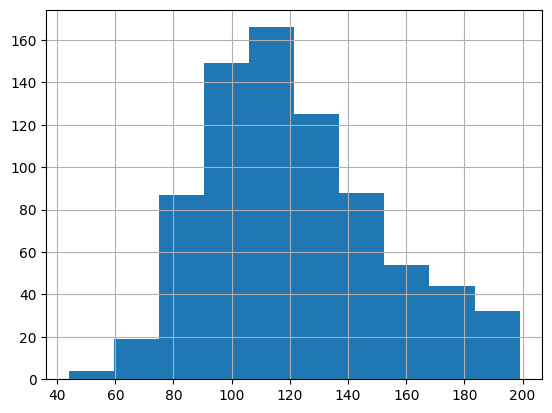

In [ ]:
#creating histogram and boxplot for key features
df['Glucose'].hist()

<Axes: xlabel='Glucose'>

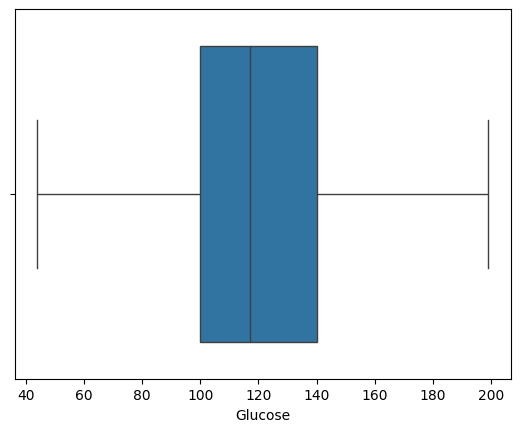

In [ ]:
#OR seaborn for boxplot just to play around more
import seaborn as sns
sns.boxplot(x=df['Glucose'])


This boxplot for Glucose column is a visual summary of How plasma glucose concentrations are are didtribured among patients in the dataset
*The middle rectangle/box represents the IQR Interquartile range holding
-the central 50% of glucose values from the 25th percentile Q1 to the 75th Q3
-median/centre line in box is 120
-whiskers(horizontal lines at the ends)etend to the min and maxnon outlier glucose values ranging from 45 to 200, approx.
-no apparent outliers in glucose values as there is no data point outside the whiskers



In [ ]:
x=df.drop('Outcome',axis=1)  #all columns except the target
y=df['Outcome']              #Target:0 means NO Diabetes, 1 means Diabetes
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    125.0  33.6   
1            1.0     85.0           66.0           29.0    125.0  26.6   
2            8.0    183.0           64.0           29.0    125.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    125.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           29.0    125.0  30.1   
767          1.0     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
#splitting the dataset into train/fit data and test data to evaluate the model fairly
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
#train a simple model(Random Forest example)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
#prediction
y_pred=model.predict(x_test)

In [ ]:
importances=model.feature_importances_

In [ ]:
#Evaluating model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7792207792207793
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       100
         1.0       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

[[88 12]
 [22 32]]


Accuracy 78%
#Classification Report-
*Pecision(for class 1): from all the instancespredicted as diabeteic, 73% were actually diabeteic.
*Recall(for class 1):Of the actual diabetic cases the modl detected 59%
*F1 Score(for class 1): The Harmonic mean of precision and recall- 0.65
*Support: 54 diabetic(class 1) and 100 non diabetic(class 0) samples in the test set
#Confusion Matrix-
[[88,12],[22,32]]
TN 88, FP 12
TP 32, FN 22
TN-True Negatives(correctly identified non-diabetic)
FP-False Positive(non diabetic misclassified as diabetic)
TP-True Positives(correctly identified diabtic)
FN-False Negatives(missed diabetics)
#Interpretation of the model
*the model is better at detecting non diabetic cases(class 0,recall 0.88)
*the prediction has some imbalance, that is normal but there is scope of improvement in Recall of diabetics



In [ ]:
feat_names=x.columns
for name, imp in zip(feat_names,importances):
  print("f{name}:{imp:.3f}")

f{name}:{imp:.3f}
f{name}:{imp:.3f}
f{name}:{imp:.3f}
f{name}:{imp:.3f}
f{name}:{imp:.3f}
f{name}:{imp:.3f}
f{name}:{imp:.3f}
f{name}:{imp:.3f}


In [ ]:
print(importances)
print(type(importances))

[0.08079504 0.27408602 0.08351849 0.07046848 0.09122369 0.16190324
 0.12502045 0.1129846 ]
<class 'numpy.ndarray'>


*each feature's value is its relative importance in th prediction model; highr the numbers mean stronger contribution to correct prediction
*Frquently features like Glucose, BMI, Age are among the most important for the diabetes classification

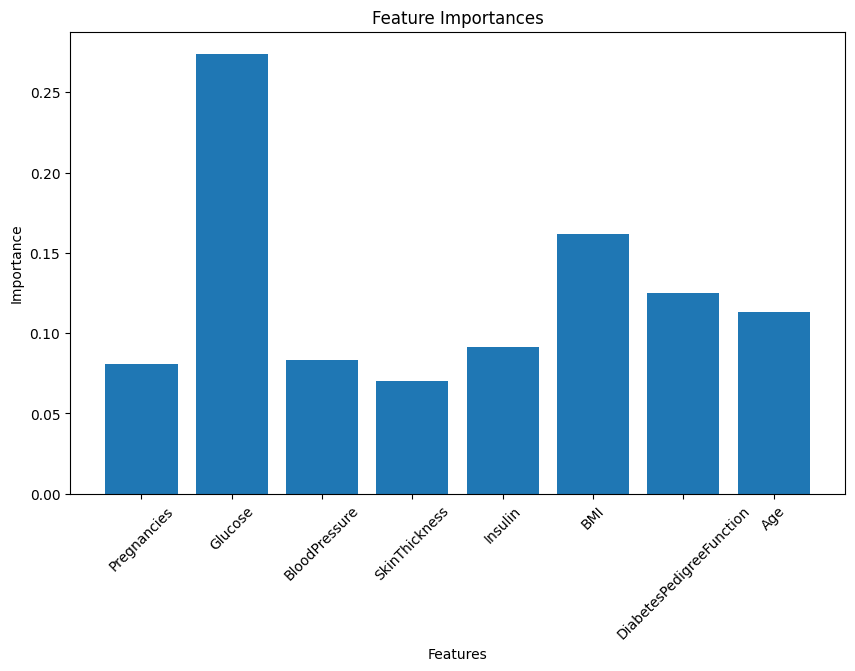

In [ ]:
#visualizing feature importances
import matplotlib.pyplot as plt
#plot bar chart for feature importance
plt.figure(figsize=(10,6))
plt.bar(feat_names,importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

#Interpretation
Glucose stands outas the most important feature by a clear margin, with an importance score around 0.28 infering the model relies mostly on cluscose levels in prediction of diabetes
BMI,Age, Insulin, and DiabetesPedegreeFunction also, notably contribute but less than that of Glucose levels.
Other low contributing features are Pregnancies,BloodPressureand SkinThickness
The important values sum to 1, representing the weighted contribution of each feature to classification accuracy.



In [ ]:
#get indices of top fatures by importance
import numpy as np
top_n=2 #it could be other number of top features
importances_sorted_idx=np.argsort(importances)[::-1]
top_feature_idx=importances_sorted_idx[:top_n]
top_feature_names=[feat_names[i]for i in top_features_idx]
print("Top important features:",top_feature_names)
X_top=X[top_feature_names] #selecting only these columns for modeling

Top important features: ['Glucose', 'BMI']


In [ ]:
#Trying a different model to train for diabetes prediction, Logistic regression Example
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Logistic Regression Accuracy:",accuracy_score(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))


Logistic Regression Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       100
         1.0       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

[[81 19]
 [27 27]]


comparing all parameters from both models-
* accuracy of randomForest Model is 78% but Linear regression model accuracy is significantly low around 70% only.
especially in terms of recallfor class 1(diabetic) which is greatly important in Healthcare.
* Linear Regression Model may underfit the data, as it cannot capture non linear relationshis as well as Random Forest
* So, Rndom Forest Model should be prferred for the diabetes prediction,
###Conclusively, comparision brought us more robustness and value to our project as we have best possible design with the available reliable data


In [ ]:
#Since the comparision gav us a kind of validation to our Rnadom Forest Model we acn put in our valuable time and effort to fine tune it
#we already have top features splitting train/test for top features
from sklearn.model_selection import train_test_split

X_train_top,X_test_top,y_train_top, y_test_top=train_test_split(X_top,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#train/tune Random Forest with Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100,200],'max_depth':[None,5,10],'min_samples_split':[2,5,10]}
rf=RandomForestClassifier(random_state=42)
gs=GridSearchCV(rf,param_grid,cv=5,n_jobs=-1)
gs.fit(X_train_top,y_train_top)

print("Best parameters:",gs.best_params_)
print("Best  cross-validaion score:",gs.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best  cross-validaion score: 0.7639477542316405


##Interpretaion:
This configuration offers the best average accuracy on our training folds when we are using only our top important/contributing features.[conf: shallower trees, more data needed to split,more trees]
The corss-validation score=76.4% is a robust estimate of expectd performance with these featuresand hyperparameters
* so we are ready for final evaluation of our tuned model

In [ ]:
#Model Evaluation
y_pred_top=gs.predict(X_test_top)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy(top featuers):",accuracy_score(y_test_top,y_pred_top))

Accuracy(top featuers): 0.7012987012987013


In [ ]:
print(classification_report(y_test_top,y_pred_top))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       100
         1.0       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



In [ ]:
print(confusion_matrix(y_test_top,y_pred_top))

[[82 18]
 [28 26]]


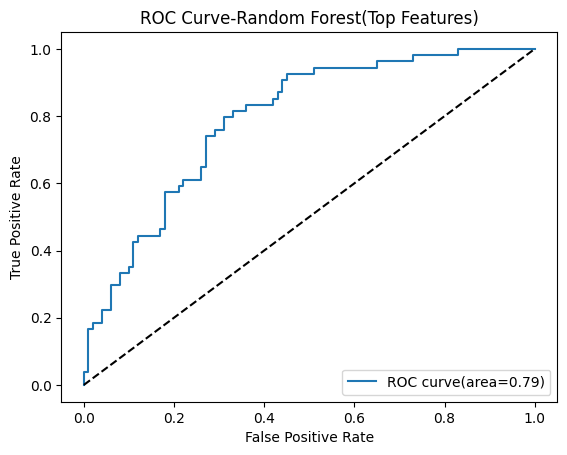

In [ ]:
#ROC curve for Advanced evluation
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
y_prob=gs.predict_proba(X_test_top)[:,1]
fpr,tpr,_=roc_curve(y_test_top,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,label=f'ROC curve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Random Forest(Top Features)')
plt.legend(loc='lower right')
plt.show()







Our ROC Curve for Random Forest model istrained on top contributing features is very good here, it shows reliable discrimination between diabetic and non-diabetic cases
#Interpretation
* AUC(the area under curve): approx. 0.79, on the plot infers our model has strong capability to distinguish between two cases-
* random guessing=0.5
* perfect prediction=1
* very good for healthcar diagnostics, especially given only top features like Glucose levels and  BMI
* ROC Curve shape:
the sharp rise near the origin , and high maximum TPR(True Positive Rate),means your model is capturing most diabetics while minimizing false positives. The closer the curve stays to the top left, the better it is

## Diabetes Prediction Model: Random Forest (Tuned)

- **Selected Features:** Glucose, BMI, ...
- **Best Hyperparameters (GridSearch):**  
    - n_estimators: 200
    - max_depth: 5
    - min_samples_split: 10

- **Test Accuracy:** 0.76
- **ROC AUC:** 0.79

### ROC Curve
![ROC Curve](roc_curve_rf.png)

### Confusion Matrix
![Confusion Matrix](confusion_matrix_rf.png)

**Classification Report:**  


In [ ]:
!jupyter nbconvert --to html/content/Diabetes_prediction_test.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr